# Метод ближайших соседей

## Гипотезы компактности и непрерывности

__Гипотеза непрерывности__ (для регрессии): близким объектам соответствуют близкие ответы.

Аналогом для задач классификации служит __гипотеза компактности__: близкие объекты, как правило, лежат в одном классе.

__Формализация понятия "близости__: задана функция расстояния $\rho : X \times X \rightarrow [0, \infty).$

__Пример__. Евклидово расстояние и его обобщение:

$$\rho(x, x_i) = \Big(\sum\limits_{j=1}^{n}|x^j - x_i^j|^2\Big)^{\frac{1}{2}}\ \rho(x, x_i) = \Big(\sum\limits_{j=1}^{n}w_{j}|x^j - x_i^j|^p\Big)^{\frac{1}{p}}$$

$x = (x^1, \ldots, x^n)$ - вектор признаков объекта $x$.

$x_i = (x_i^1, \ldots, x_i^n)$ - вектор признаков объекта $x_i$.

## Еще примеры расстояний

- __между текстами__ (расстояние Левенштейна)

- __между сигналами__ (энергия сжатий и растяжений)

## Обобщенный метрический классификатор

__Алгоритм ближайшего соседа__.

Для произвольного $x \in X$ отранжируем объекты $x_1, \ldots, x_l$:

$$\rho(x, x^{(1)}) \leq \rho(x, x^{(2)}) \leq \ldots \leq \rho(x, x^{(l)}),$$

$x^{(i)}$ - $i$-й сосед объекта $x$ среди $x_1, \ldots, x_l$;

$y^{(i)}$ - ответ на $i$-м соседе объекта $x$.

__Метрический алгоритм классификации__:

$$a(x, X^l) = \arg\max_{y \in Y} \underbrace{\sum\limits_{i=1}^{l}\Big[y^{(i)} = y\Big]w(i, x)}_{\text{Г}_y(x)},$$

$w(i,x)$ - вес, оценка сходства объекта $x$ с его $i$-м соседом, неотрицательная, не возрастающая по $i$.

$\text{Г}_y(x)$ - _оценка близости_ объекта $x$ к классу $y$.

## Метод k-ближайших соседей

$w(i, x) = [i \leq k]$ - k nearest neighbors, kNN.

$w(i, x) = [i \leq 1]$ - метод ближайшего соседа.

__Преимущества__:

- простота реализации (lazy-learning)

- параметр $k$ можно оптимизировать по критерию скользящего контроля (leave-one-out):

$$LOO(k, X^l) = \sum\limits_{i=1}^{l}\Big[a(x_i; X^l\setminus\{x_i\}, k) \neq y_i\Big] \rightarrow \min_k.$$

__Проблема__:

- неоднозначность классификации при $\text{Г}_y(x) = \text{Г}_s(x)$ для пары классов $y \neq s.$

- для любого четного $k$ может возникнуть проблема неоднозначности классификации в случае kNN для бинарной классификации, так как в этом случае может оказаться что $k/2$ объектов принадлежат одному классу, а оставшиеся $k/2$ - другому.

- учитываются не значения расстояний, а только их ранги.

## Пример зависимости LOO от числа соседей

__Пример__. Задача Iris, усреднение по $50$ случайным разбиениям.

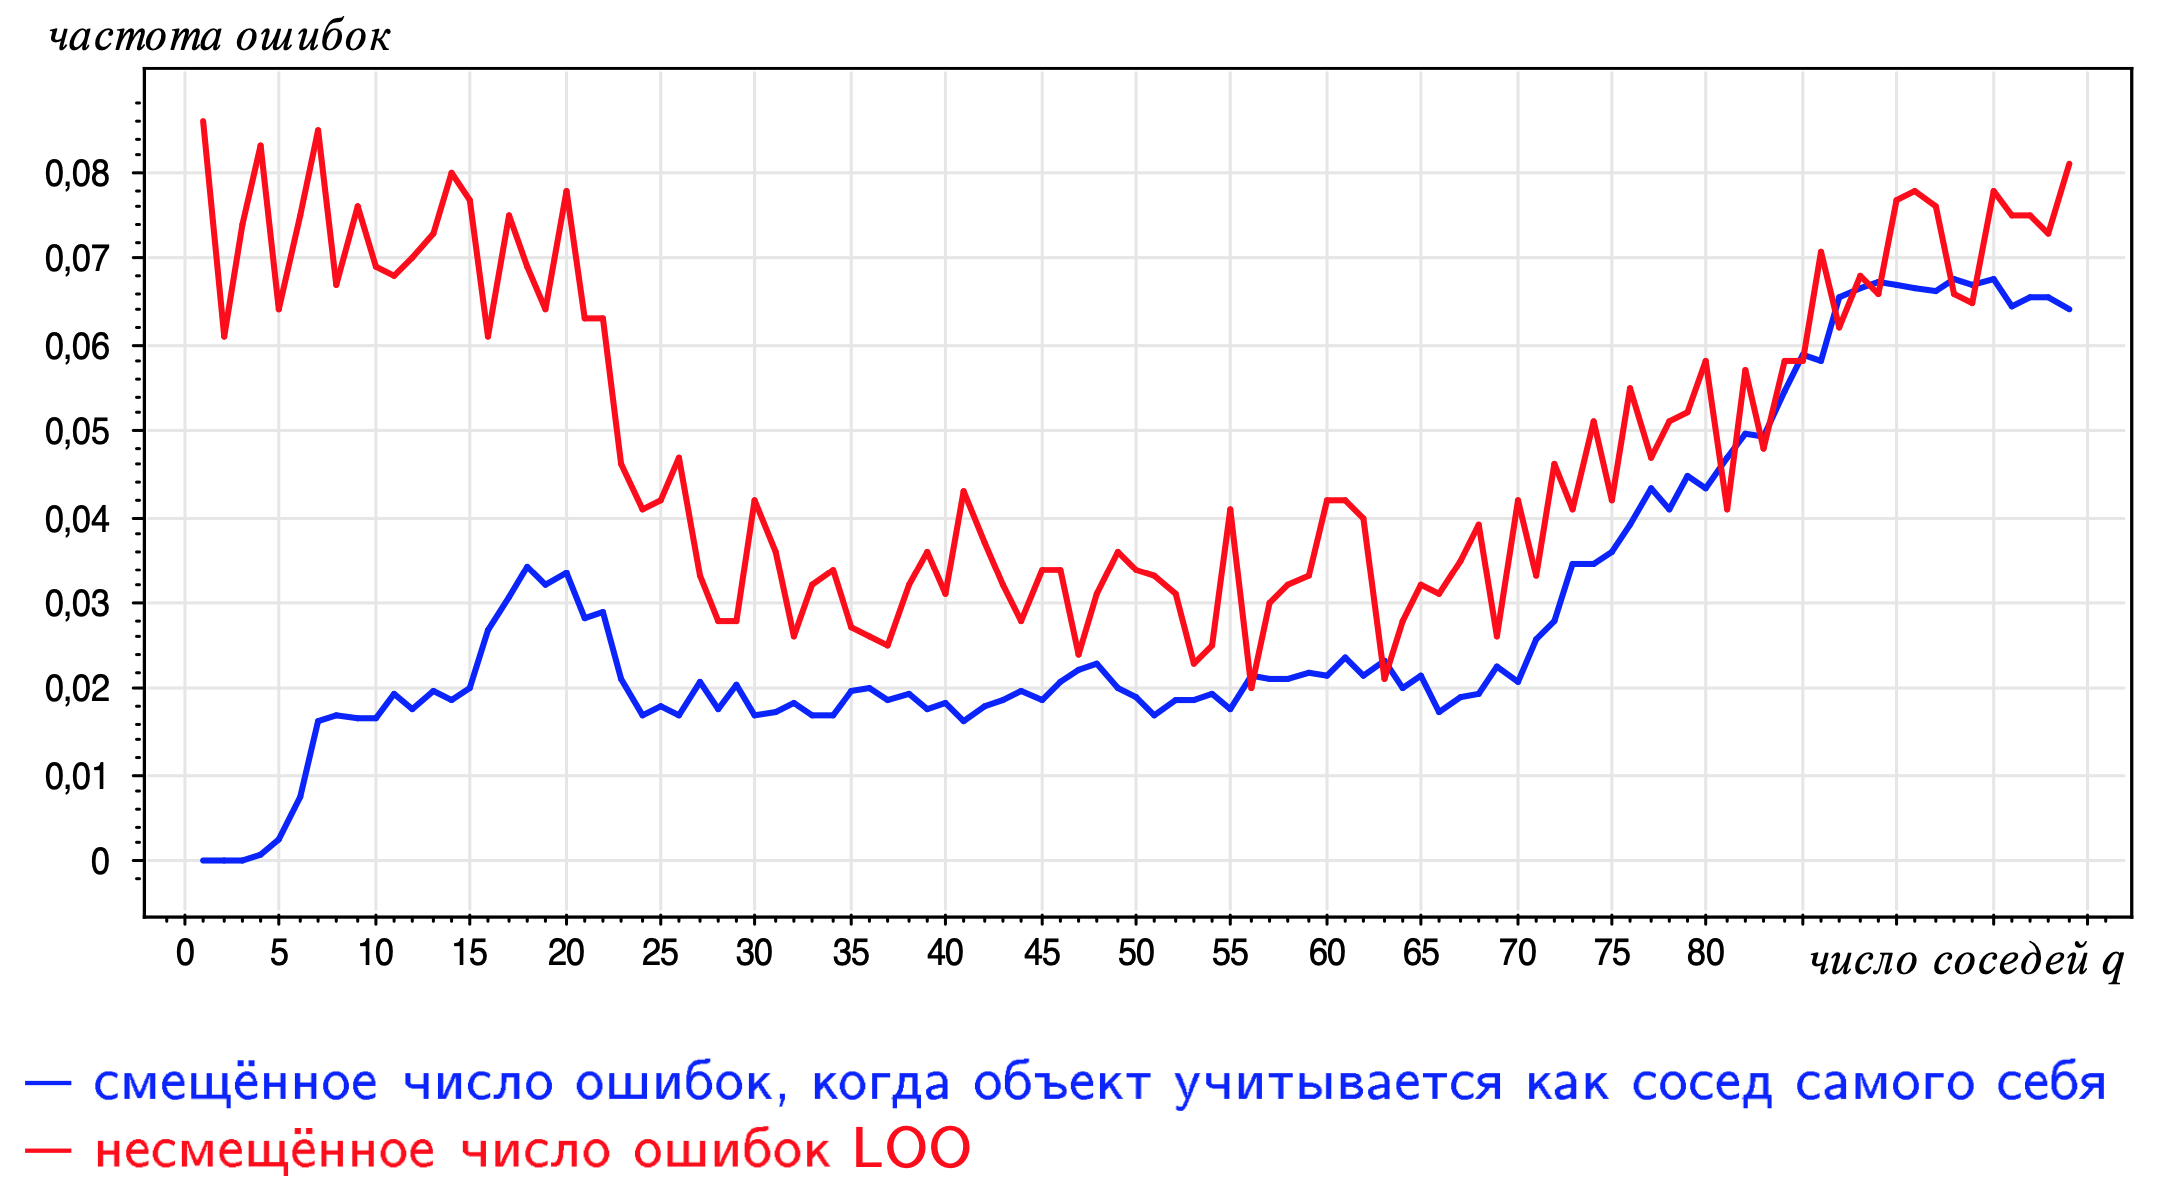

In [3]:
from IPython.display import Image
Image(filename='images/2.1 Метрические методы/example_1.png')

На этом графике приведены две кривые: выборка цветков ириса, и использованы два алгоритма. Первый алгоритм — это классификация методом $k$ ближайших соседей. И когда классифицируется некий объект обучающей выборки, сам же он является своим собственным соседом, и это дает синюю кривую. 

Если же сам объект исключается из числа своих соседей, получается красная кривая. Видно, что синяя кривая дает оптимистически смещенную оценку числа ошибок на контрольных выборках. Кажется, что оптимально использовать одного соседа, но если объект сам же является своим собственным соседом, то понятно, что это некий обман и так делать нельзя.

И здесь на красной кривой видно, что в данной задаче оптимально брать где-то от $30$ до $60$ соседей, а синяя кривая нам дает ложный ответ, что надо пользоваться методом первого ближайшего соседа. Этот метод практически никогда не работает надежно. В реальных задачах минимум редко бывает при $k=1$.

# Метод окна Парзена

$w(i, x) = K\Big(\frac{\rho(x, x^{(i)}}{h}\Big)$, где $h$ - ширина окна,

$K(r)$ - ядро, не возрастает и положительно на $[0,1]$.

Метод парзеновского окна _фиксированной ширины:_

$$a(x; X^l, h, K) = \arg\max_{y \in Y} \sum\limits_{i=1}^{l}[y_i = y]K\Big(\frac{\rho(x, x_{i})}{h}\Big)$$

Метод парзеновского окна _переменной ширины:_

$$a(x; X^l, k, K) = \arg\max_{y \in Y} \sum\limits_{i=1}^{l}[y_i = y]K\Big(\frac{\rho(x, x_{i})}{\rho(x, x^{(k+1)})}\Big)$$

__Оптимизация параметров__ - по критерию LOO:

- выбор ширины окна $h$ или числа соседей $k$

- выбор ядра $K$ слабо влияет на качество классификации

В случае константного ядра $(K(r) = c, c > 0)$ предпочтение всегда будет отдаваться одному классу. Функция $K(r) = c$ при $c > 0$ подходит под определение ядра в данном случае (не возрастает и положительна на всей области), однако не имеет смысла, так как не учитывает расстояние между объектами.

Метод окна Парзена требует лишь выбора метрики, ядра и ширины окна.

## Метод потенциальных функций

В методе парзеновского окна можно представить себя, стоящими в точке $x$ (это точка классифицируемого объекта), и мы смотрим на окрестность этой точки и подсчитываем число объектов, попавших в эту окрестность, и принимаем решение о классе. Можно считать, что функция расстояния симметрична, поэтому можно представить себя, стоящими по очереди в каждом обучающем объекте, и думать, что каждый объект обучающей выборки распространяет вокруг себя потенциал своего класса. Это прямая аналогия с электростатикой. 

Если представить себе, что точки — это заряженные частицы (положительные и отрицательные), то каждая точка распространяет вокруг себя электрическое поле. И фактически знак этого поля в произвольной точке пространства $x$ как раз и покажет, к чему мы ближе: к положительно заряженным объектам или к отрицательно заряженным объектам. 

$w(i, x) = \gamma^{(i)}K\Big(\frac{\rho(x, x^{(i)})}{h^{(i)}}\Big)$

Более простая запись (без ранжирования объектов):

$$a(x; X^l) = \arg\max_{y \in Y} \sum\limits_{i=1}^{l}[y_i = y]\gamma_iK\Big(\frac{\rho(x, x_{i})}{h_i}\Big),$$

где $\gamma_i$ - веса объектов, $\gamma_i \geq 0, h_i > 0.$

__Физическая аналогия__:

- $\gamma_i$ - величина "заряда" в точке $x_i$;

- $h_i$ - "радиус действия" потенциала с центром в точке $x_i$;

- $y_i$ - знак "заряда" (в случае двух классов $Y = \{-1, +1\})$.

Этот метод хорош тем, что в нем теперь появляются параметры, и с каждым объектом обучающей выборки можно связать два числа. Первое — это величина "заряда", находящаяся в точке — насколько эта точка важна для классификации, и вторая — насколько эта точка далеко распространяет вокруг себя потенциал. $h_i$-тое — это радиус действия потенциала с центром в обучающем объекте. 

Таким образом у нас получается классификатор, существенно обогащенный параметрами. Теперь можно настраивать эти параметры по обучающей выборке. Собственно, алгоритм перестает быть ленивым. Не только надо хранить обучающую выборку, но и настроить эти параметры.

Как они настраиваются?

## Метод потенциальных функций = линейный классификатор

На самом деле классификатор метода потенциальных функций — это разновидность линейного классификатора. О линейных классификаторах мы будем говорить с вами дальше, и мы изучим подробно методы, которыми можно настраивать веса в линейных классификаторах. Сейчас для нас принципиально важен вот какой момент, что здесь в качестве признаков мы фактически используем функции близости между классифицируемым объектом и объектом обучающей выборки. 

То есть каждый обучающий объект индуцирует признак, и признаков здесь ровно столько, сколько объектов обучающей выборки. Вот это глубинное сходство между метрическим классификатором (методом потенциальных функций) и линейным классификатором дает очень большую свободу при использовании линейных моделей классификации. Мы понимаем, что признаки — это могут быть исходно имеющиеся признаки, а можно в качестве признаков использовать близость до объектов обучающей выборки. Это очень интересная возможность, которая в разных задачах может принести вам успех и повышение точности классификации.

Два класса $Y = \{-1, + 1\}.$

$$a(x, X^l) = \arg\max_{y\in Y}\text{Г}_y(x) = \mathrm{sign}(\text{Г}_{+1}(x) - \text{Г}_{-1}(x)) = \mathrm{sing}\sum\limits_{i=1}^{l}\gamma_i y_i K\Big(\frac{\rho(x, x_{i})}{h_i}\Big).$$

Сравним с линейной моделю классификации:

$$a(x) = \mathrm{sing}\sum\limits_{j=1}^{l}\gamma_j f_j(x).$$

- функции $f_j(x) = y_j K\Big(\frac{\rho(x, x_{j})}{h_j}\Big)$ - признаки объекта $x$

- $\gamma_j$ - веса линейного классификатора

- $n = l$ - число признаков равно числу объектов обучения

## Резюме

- Метрические классификаторы - одни из самых простых. Качество классификации определяется качеством метрики.

- Что можно обучать:

 - число ближайших соседей $k$ или ширину окна $h$;
 
 - веса объектов;
 
 - набор эталонов (prototype selection);
 
 - метрику (distance learning, similarity learning);
 
 - веса признаков;
 
 - функцию ядра $K(r)$.

# Метрические методы классификации в задаче восстановления регрессии

Выше были рассмотрены метрические методы классификации, основанные на идее измерения расстояний между объектами. Эту же идею можно перенести и на задачу восстановления регрессии.

## Задачи регрессии и метод наименьших квадратов

$X$ - объекты (часто $\mathbb{R}^n$); $Y$ - ответы (часто $\mathbb{R}$, реже $\mathbb{R}^m$);